In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.metrics import mean_absolute_error

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib inline

In [13]:
W = 5
b = 3
variance = 2
epochs = 500
batch_size = 100

x_data = [np.random.randint(100) for i in range(10000)]
y_data = [i * W + b + np.random.uniform(low=-5, high=5) for i in x_data]

df = pd.DataFrame({'x': x_data, 'y': y_data})

In [14]:
df.head()

,x,y
0,38,194.539314
1,3,18.870125
2,12,58.348410
3,92,458.002036
4,26,131.962605


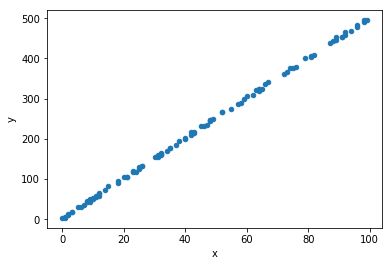

In [15]:
df.iloc[:100].plot('x', 'y', kind='scatter')

In [16]:
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
_W = tf.Variable(np.random.random(), dtype=tf.float32)
_b = tf.Variable(np.random.random(), dtype=tf.float32)

In [17]:
prediction = tf.add(tf.multiply(x, _W), _b)
loss = tf.losses.mean_squared_error(labels=y, predictions=prediction)
optimizer = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)

In [18]:
losses = list()
weights = list()
biases = list()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    pre_pred = sess.run([prediction], feed_dict={x: x_data})
    
    for _ in range(epochs):
        
        currentBatch = 0
        while currentBatch <= len(x_data):
            batchX = x_data[currentBatch:currentBatch+batch_size]
            batchY = y_data[currentBatch:currentBatch+batch_size]
            currentBatch += batch_size
            
            sess.run([optimizer], feed_dict={x: batchX, y: batchY})
        
        __l, __w, __b = sess.run([loss, _W, _b], feed_dict={x: x_data, y: y_data})
        
        if _ % 100 == 0:
            print('Epoch {}'.format(_))
            print('Loss: {}'.format(__l))
            print('W: {}'.format(__w))
            print('b: {}'.format(__b))
            print('\n'*2)
            
        losses.append(__l)
        weights.append(__w)
        biases.append(__b)
        
    print('FINAL Epoch {}'.format(epochs))
    print('Loss: {}'.format(__l))
    print('W: {}'.format(__w))
    print('b: {}'.format(__b))
    print('\n'*2)
    
    post_pred = sess.run([prediction], feed_dict={x: x_data})

Epoch 0
Loss: 9.434721946716309
W: 5.032373428344727
b: 0.968461275100708



Epoch 100
Loss: 8.79147720336914
W: 5.02061128616333
b: 1.7642971277236938



Epoch 200
Loss: 8.559149742126465
W: 5.013526439666748
b: 2.2436487674713135



Epoch 300
Loss: 8.47547721862793
W: 5.00925874710083
b: 2.5323944091796875



Epoch 400
Loss: 8.44550609588623
W: 5.006688594818115
b: 2.706320285797119



FINAL Epoch 500
Loss: 8.434917449951172
W: 5.005152225494385
b: 2.810270071029663





Text(0,0.5,'Loss')

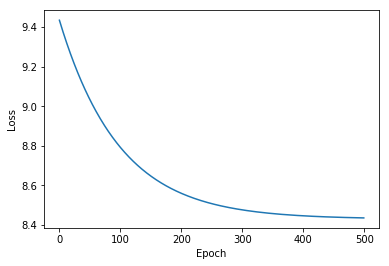

In [19]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0,0.5,'Weight')

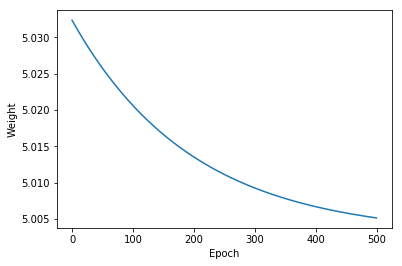

In [20]:
plt.plot(range(epochs), weights)
plt.xlabel('Epoch')
plt.ylabel('Weight')

Text(0,0.5,'Bias')

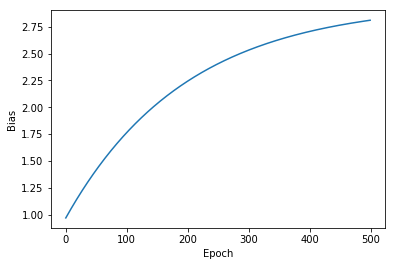

In [21]:
plt.plot(range(epochs), biases)
plt.xlabel('Epoch')
plt.ylabel('Bias')

In [22]:
print('Error Loss Before Training: ', mean_absolute_error(y_pred=np.array(pre_pred).reshape(-1), y_true=y_data))
print('Error Loss After Training: ', mean_absolute_error(y_pred=np.array(post_pred).reshape(-1), y_true=y_data))

Error Loss Before Training:  222.80032271446706
Error Loss After Training:  2.5210474001398118
